<a href="https://colab.research.google.com/github/Nikunjbansal99/AsteroidDiameterPrediction/blob/main/AsteroidDiameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methodology**


*   Importing Some Basic Libraries
*   Importing Data
*   Performing Descriptive Analysis of the dataset to know data better before Pre-processing
*   Checking null values
*   Doing Pre-processing
*   Cleaning data from unwanted symbols.
*   Plotting the Histogram.
*   Handling missing values
*   Processing Categorical Values by Performing Label Encoding on it
*   Performing Descriptive Analysis of the dataset after Pre-processing
*   Analysis of Target Variable using Scatter Plot, distplot, Correlation Matrix & Heat Map
*   Applying Feature Selection to get top 10 most Correlated features w.r.t Target Feature
*   Perform analysis on selected features w.r.t Target Feature i.e. diameter
*   Splitting selected_full_df into 70% and 30% to construct training data and testing data respectively
*   Using for loop we search for most suitable learning_rate.
*   Implements XGBoost Regression Model
*   Evaluation on Training Data by using Average Error, Accuracy, R^2 Score, Mean Squared Error, Mean Absolute Error, Median Absolute Error, Explained Variance Score
*   Evaluation on Testing Data by using Average Error, Accuracy, R^2 Score, Mean Squared Error, Mean Absolute Error, Median Absolute Error, Explained Variance Score
*   Visualization using Error Difference Vs Predictions plot and Actual Vs Prediction plot on Testing Data
*   Save predictions on Testing data in .csv format.













# **Importing Some Basic Libraries**

In [1]:
!pip install xgboost

In [2]:
!pip install --upgrade xgboost

     |████████████████████████████████| 157.5MB 74kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
from sklearn.metrics import r2_score,explained_variance_score
from sklearn.model_selection import train_test_split

# **Importing Data**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
input_data_dir = "/content/gdrive/My Drive/Task_4/"
full_df = pd.read_csv(os.path.join(input_data_dir, "Asteroid_Updated.csv"))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
full_df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


# **Descriptive Analysis of the dataset Before Pre-processing**

In [7]:
print("Size of full dataset       : {}".format(full_df.shape))

Size of full dataset       : (839714, 31)


## **Data Description**

### **Full Data**

In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

## **NULL VALUES**

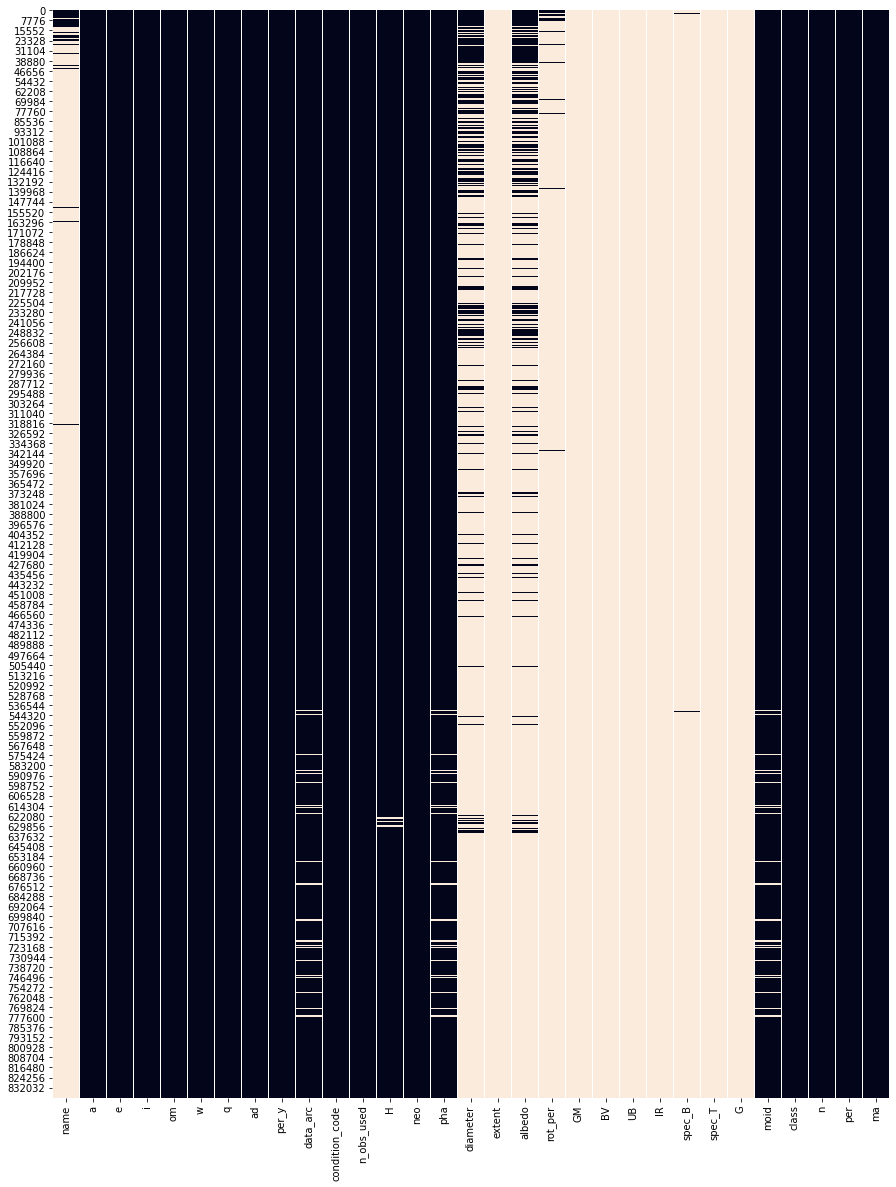

In [9]:
plt.figure(figsize=(15, 20))
sns.heatmap(full_df.isnull(), cbar=False)        #plotting heatmap using sns library to find missing values in train_df
plt.show()

In [ ]:
full_df.isna().sum()                        # Printing a count of missing value w.r.t each feature.

0          0
1          0
2          0
3          0
4          0
          ..
84         0
85         0
86         0
87         0
convert    0
Length: 89, dtype: int64

# **Pre-Processing**

**As seen above, there are some Independent Features which have more than 97%  of the total tuples are as missing values in full_df. So it is illogical to fill Missing Values for these features. Like:**

*   *name have 817747 missing values out of 839714*
*   *extent have 839696 missing values out of 839714*
*   *rot_per have 820918 missing values out of 839714*
*   *GM have 839700 missing values out of 839714*
*   *BV have 838693 missing values out of 839714*
*   *UB have 838735 missing values out of 839714*
*   *IR have 839713 missing values out of 839714*
*   *spec_B have 838048 missing values out of 839714*
*   *spec_T have 838734 missing values out of 839714*
*   *G have 839595 missing values out of 839714* 

**Hence, We are going to drop these features from our full dataframe.**

In [ ]:
full_df = full_df.drop(['name','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T','G'], axis=1)

In [ ]:
full_df.shape                # Checking the shape of full_df (initially having 31 features) 
                             # But now we dropped 10 features from it so now full_df have 21 features in it.

(839714, 21)

## **Cleaning Data**

In [ ]:
full_df['condition_code'] = full_df['condition_code'].str.replace('E', '5')
full_df['condition_code'] = full_df['condition_code'].str.replace('D', '4')

In [ ]:
full_df['diameter'] = full_df['diameter'].astype('float')
full_df['diameter'].head()

0    939.400
1    545.000
2    246.596
3    525.400
4    106.699
Name: diameter, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45a46ebe80>,
      dtype=object)

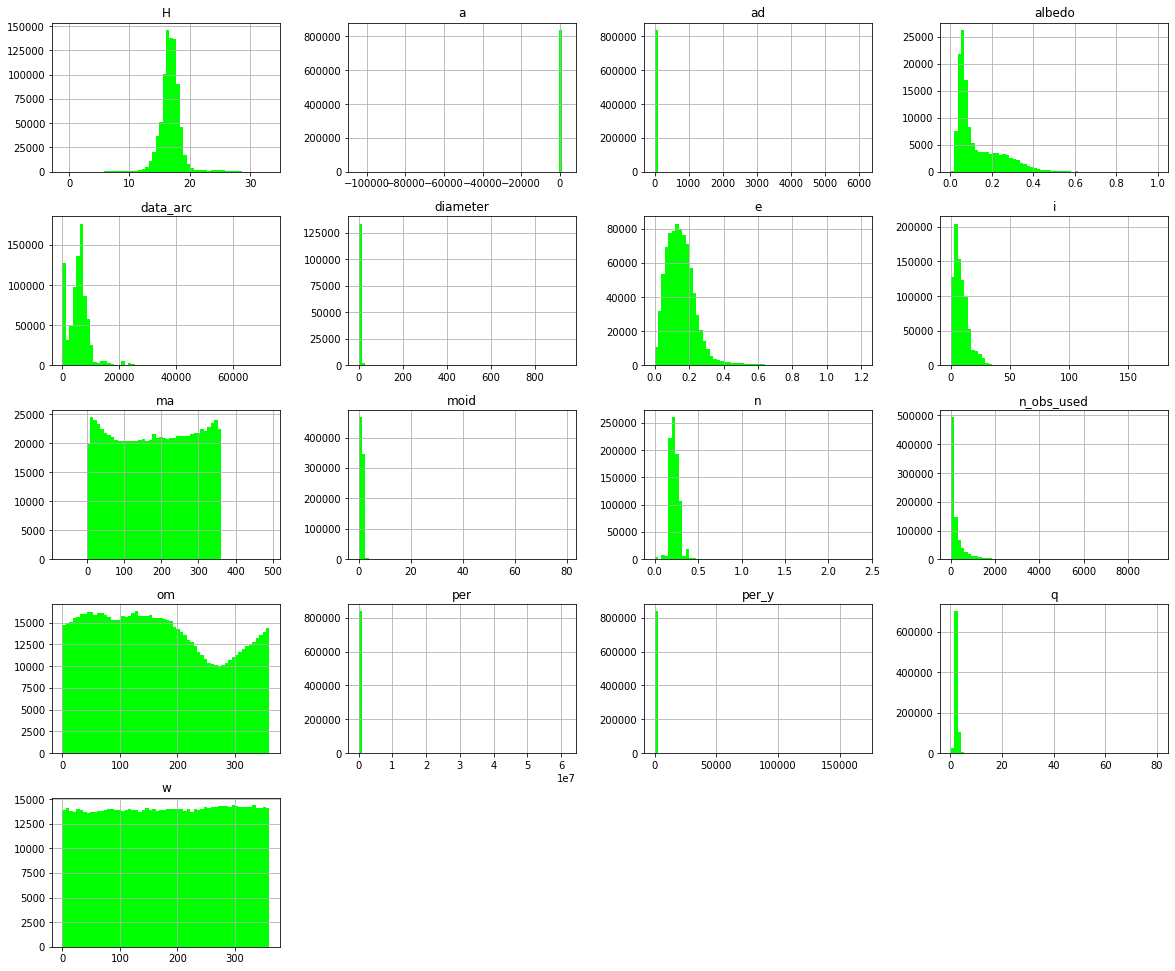

In [ ]:
full_df.hist(bins = 60, figsize = (20,17), color='lime')

**I plotted the histogram to check the distribution of a sample of data.**

## **Handling Missing Values**

**Now, Firstly we are going to remove the tuples in which value for "albedo" Feature is missing because those tuple's are of no use for us. Neither in Training nor in Testing.**

In [ ]:
full_df = full_df.dropna(axis=0, subset=['albedo'])
full_df['albedo'].isna().sum()             # Prints the remaining missing values in 'albedo' feature.

0

In [ ]:
full_df['condition_code'].fillna(full_df['condition_code'].mode()[0], inplace=True)
full_df['condition_code'] = full_df['condition_code'].astype('int')  # Since it is the discrete numbers(codes) so we used mode to replace the missing value.
full_df['condition_code'].isna().sum()                               # Prints the remaining missing values in 'condition_code' feature.

0

In [ ]:
full_df['a'].fillna(full_df['a'].mean(),inplace=True)    # Since it is not properly distributed as we seen in above histogram.
full_df['a'].isna().sum()                                # Prints the remaining missing values in 'a' feature.

0

In [ ]:
full_df['ad'].fillna(full_df['ad'].mean(),inplace=True)         # Since it is not properly distributed as we seen in above histogram.
full_df['ad'].isna().sum()                                      # Prints the remaining missing values in 'ad' feature.

0

In [ ]:
full_df['per_y'].fillna(full_df['per_y'].mean(),inplace=True)   # Since it is not properly distributed as we seen in above histogram.
full_df['per_y'].isna().sum()                                   # Prints the remaining missing values in 'per_y' feature.

0

In [ ]:
full_df['data_arc'].fillna(full_df['data_arc'].median(), inplace=True) # Since it is properly distributed as we seen in above histogram.
full_df['data_arc'].isna().sum()                           # Prints the remaining missing values in 'data_arc' feature.

0

In [ ]:
full_df['H'].fillna(full_df['H'].mode()[0], inplace=True)   # Since it is properly distributed as we seen in above histogram.
full_df['H'].isna().sum()                                   # Prints the remaining missing values in 'H' feature.

0

In [ ]:
full_df['neo'].fillna(full_df['neo'].mode()[0], inplace=True)   # Because this feature contains Y/N type of values.
full_df['neo'].isna().sum()                                     # Prints the remaining missing values in 'neo' feature.

0

In [ ]:
full_df['pha'].fillna(full_df['pha'].mode()[0], inplace=True)   # Because this feature contains Y/N type of values.
full_df['pha'].isna().sum()                                    # Prints the remaining missing values in 'pha' feature.

0

In [ ]:
full_df['moid'].fillna(full_df['moid'].median(), inplace=True)      # Since it is properly distributed as we seen in above histogram.
full_df['moid'].isna().sum()                                         # Prints the remaining missing values in 'moid' feature.

0

In [ ]:
full_df['n'].fillna(full_df['n'].mean(), inplace=True)      # Since it is not properly distributed as we seen in above histogram.
full_df['n'].isna().sum()                                   # Prints the remaining missing values in 'n' feature.

0

In [ ]:
full_df['per'].fillna(full_df['per'].mean(), inplace=True)   # Since it is not properly distributed as we seen in above histogram.
full_df['per'].isna().sum()                                  # Prints the remaining missing values in 'per' feature.

0

In [ ]:
full_df['ma'].fillna(full_df['ma'].median(), inplace=True)         # Since it is properly distributed as we seen in above histogram.
full_df['ma'].isna().sum()                                          # Prints the remaining missing values in 'ma' feature.

0

## **Processing Categorical value**

In [ ]:
full_df_encode = pd.DataFrame()

In [ ]:
# There are three Features in our data which are going to encode.
full_df_encode = full_df[['neo', 'pha', 'class']]
full_df_encode.head()

,neo,pha,class
0,N,N,MBA
1,N,N,MBA
2,N,N,MBA
3,N,N,MBA
4,N,N,MBA


In [ ]:
# Features which are not going to encode.
full_df_not_encode = full_df.drop(['neo', 'pha', 'class'], axis=1)
full_df_not_encode.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,moid,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,9,1002,3.34,939.400,0.0900,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,9,8490,4.13,545.000,0.1010,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,9,7104,5.33,246.596,0.2140,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9,9325,3.20,525.400,0.4228,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,9,2916,6.85,106.699,0.2740,1.09589,0.238632,1508.600458,282.366289


In [ ]:
le = LabelEncoder()            # Using Label Encoder to encode features that are having data type as object.
for i in full_df_encode:
    full_df_encode[i]=le.fit_transform(full_df_encode[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
full_df_encode.tail()

,neo,pha,class
797835,0,0,6
797860,0,0,6
798077,0,0,6
799752,0,0,6
810375,0,0,6


In [ ]:
full_df = pd.concat([full_df_encode, full_df_not_encode], axis=1)

# **Descriptive Analysis of the dataset After Pre-processing:**

In [ ]:
full_df.head()

,neo,pha,class,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,moid,n,per,ma
0,0,0,6,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,9,1002,3.34,939.400,0.0900,1.59478,0.213885,1683.145708,77.372096
1,0,0,6,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,9,8490,4.13,545.000,0.1010,1.23324,0.213503,1686.155999,59.699133
2,0,0,6,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,9,7104,5.33,246.596,0.2140,1.03454,0.226019,1592.787285,34.925016
3,0,0,6,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9,9325,3.20,525.400,0.4228,1.13948,0.271609,1325.432765,95.861936
4,0,0,6,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,9,2916,6.85,106.699,0.2740,1.09589,0.238632,1508.600458,282.366289


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136409 entries, 0 to 810375
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             136409 non-null  int64  
 1   pha             136409 non-null  int64  
 2   class           136409 non-null  int64  
 3   a               136409 non-null  float64
 4   e               136409 non-null  float64
 5   i               136409 non-null  float64
 6   om              136409 non-null  float64
 7   w               136409 non-null  float64
 8   q               136409 non-null  float64
 9   ad              136409 non-null  float64
 10  per_y           136409 non-null  float64
 11  data_arc        136409 non-null  float64
 12  condition_code  136409 non-null  int64  
 13  n_obs_used      136409 non-null  int64  
 14  H               136409 non-null  float64
 15  diameter        136406 non-null  float64
 16  albedo          136409 non-null  float64
 17  moid      

In [ ]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
neo,136409.0,0.005894,0.076546,0.000000,0.000000,0.000000,0.000000,1.000000e+00
pha,136409.0,0.001474,0.038358,0.000000,0.000000,0.000000,0.000000,1.000000e+00
class,136409.0,6.118057,0.703879,0.000000,6.000000,6.000000,6.000000,1.000000e+01
a,136409.0,2.815361,1.528988,0.626226,2.537270,2.750809,3.092434,3.891460e+02
e,136409.0,0.145414,0.077274,0.000489,0.089684,0.138565,0.191084,9.843482e-01
i,136409.0,10.306422,6.810128,0.021855,5.095662,9.350670,13.688502,1.703236e+02
om,136409.0,169.818431,102.724948,0.000738,82.275552,160.490127,256.244420,3.599909e+02
w,136409.0,181.848130,103.556749,0.004466,91.872071,183.565785,271.671499,3.599952e+02
q,136409.0,2.403368,0.516536,0.081882,2.069254,2.364029,2.685924,4.046567e+01
ad,136409.0,3.227354,2.908854,0.999956,2.865156,3.167350,3.467913,7.722011e+02


In [ ]:
full_df.isna().sum()

neo               0
pha               0
class             0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          3
albedo            0
moid              0
n                 0
per               0
ma                0
dtype: int64

**Diameter Feature has only 3 Missing values. Thatswhy, I am dropping those tuples which contains missing value to reduce the Computation Cost. Because there is no point left that i can make test_df from only these 3 tuples.**

In [ ]:
full_df = full_df.dropna()
full_df.isna().sum()

neo               0
pha               0
class             0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
albedo            0
moid              0
n                 0
per               0
ma                0
dtype: int64

**Now, Our data is free from Missing values and is ready for doing further Analysis and Training-Testing for XGBoost Model**

# **Analysis of Target Variable**

Text(0.5, 1.0, 'Distribution of target variable')

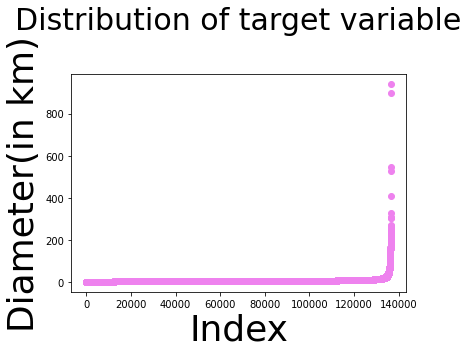

In [ ]:
X = full_df.diameter.sort_values().reset_index().index                    
y = full_df.diameter.sort_values().reset_index()["diameter"]           # Sort tuples based on diameter value 
plt.scatter(X, y, color = "violet")                                    # Plotting the scatter plot b/w Diameter Vs Index
plt.xlabel("Index", size=36)
plt.ylabel("Diameter(in km)", size=36)
plt.title("Distribution of target variable", size=30, pad=45)

count    136406.000000
mean          5.505299
std           9.422372
min           0.008000
25%           2.780000
50%           3.970000
75%           5.764000
max         939.400000
Name: diameter, dtype: float64


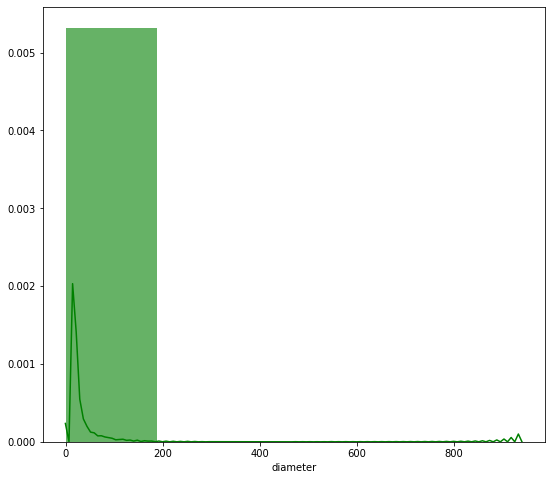

In [ ]:
print(full_df['diameter'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(full_df['diameter'], color='g', bins=5, hist_kws={'alpha': 0.6});

**Hence, it is found that our Target Variable i.e. Diameter is Right Skewed.**

## **`Correlation Matrix and Heat Map`**



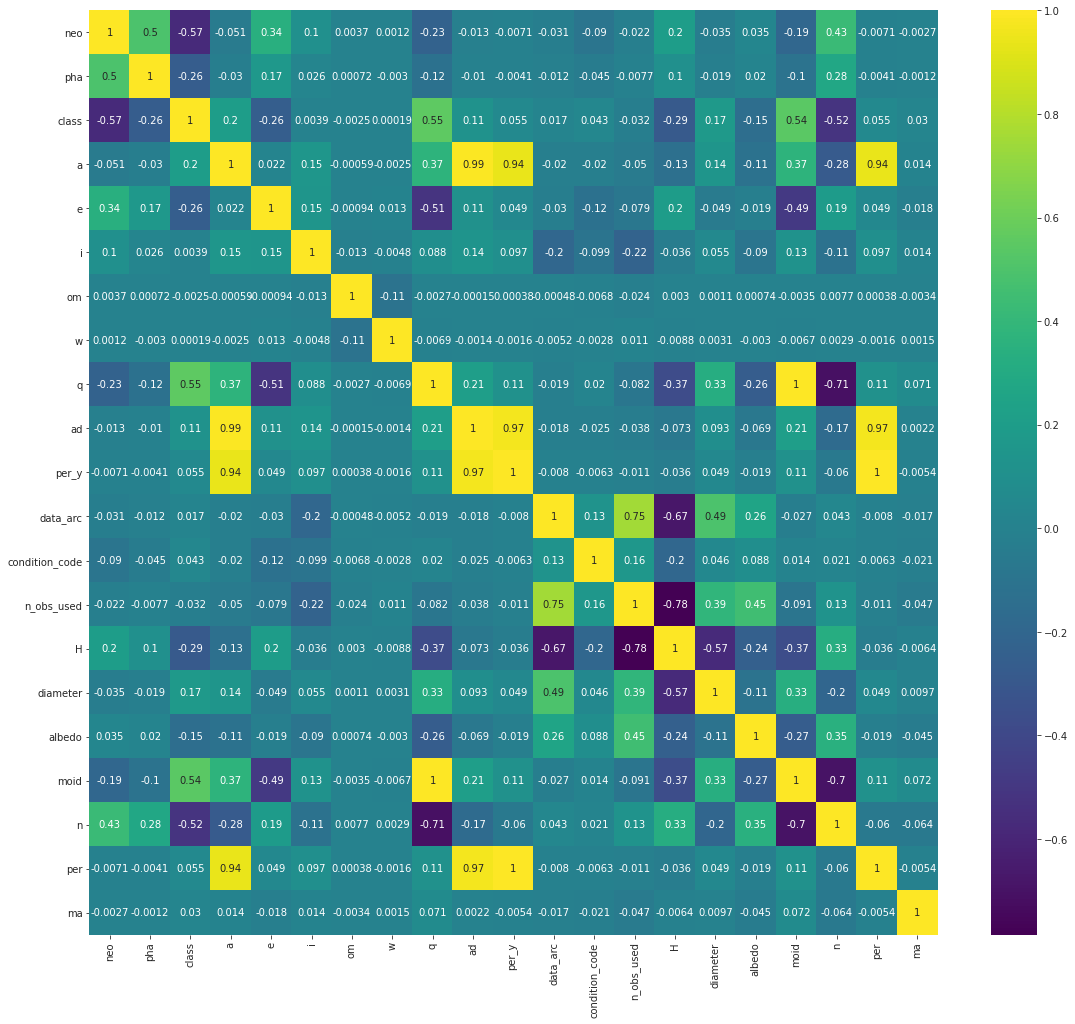

In [ ]:
corr_data = full_df.corr()                       # calculating correlation data between features
plt.figure(figsize=(19, 17))                      # setting figure size
sns.set_style('ticks')                            # setting plot style
sns.heatmap(corr_data, cmap='viridis',annot=True)                # plotting heatmap using sns library
plt.show()

## **The 10 most Important features for predicting Asteroid Diameter.**

**Applied Feature Selection**

Text(0, 0.5, 'Features')

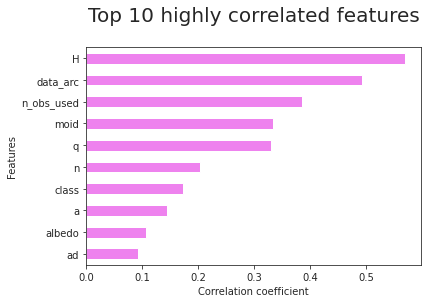

In [ ]:
corr_data.diameter.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='violet')  # calculating top 10 highest correlated faetures
                                                                                                                           # with respect to target variable i.e. "diameter"
plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [ ]:
full_df.columns

Index(['neo', 'pha', 'class', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y',
       'data_arc', 'condition_code', 'n_obs_used', 'H', 'diameter', 'albedo',
       'moid', 'n', 'per', 'ma'],
      dtype='object')

In [ ]:
# Dropping rest of the features from full_df while taking only top 10 features selected above.
full_df_X = full_df.drop(['neo', 'pha', 'e', 'i', 'om', 'w', 'per_y', 'condition_code', 'diameter', 'per', 'ma'], axis=1)
full_df_X.shape    # print shape of full_df_X

(136406, 10)

In [ ]:
full_df_X.head()           # print top 5 tuples of full_df_X

,class,a,q,ad,data_arc,n_obs_used,H,albedo,moid,n
0,6,2.769165,2.558684,2.979647,8822.0,1002,3.34,0.0900,1.59478,0.213885
1,6,2.772466,2.133865,3.411067,72318.0,8490,4.13,0.1010,1.23324,0.213503
2,6,2.669150,1.983332,3.354967,72684.0,7104,5.33,0.2140,1.03454,0.226019
3,6,2.361418,2.151909,2.570926,24288.0,9325,3.20,0.4228,1.13948,0.271609
4,6,2.574249,2.082324,3.066174,63507.0,2916,6.85,0.2740,1.09589,0.238632


In [ ]:
full_df_y = full_df.diameter
full_df_y.shape            # print shape of full_df_y

(136406,)

In [ ]:
full_df_y.head()           # print top 5 tuples of full_df_y

0    939.400
1    545.000
2    246.596
3    525.400
4    106.699
Name: diameter, dtype: float64

In [ ]:
selected_full_df = pd.concat([full_df_X, full_df_y] ,axis=1)

# **Analyzing Selected Features:**

In [ ]:
features_to_analyze = selected_full_df.columns

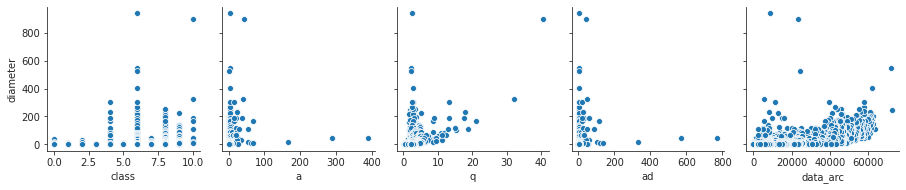

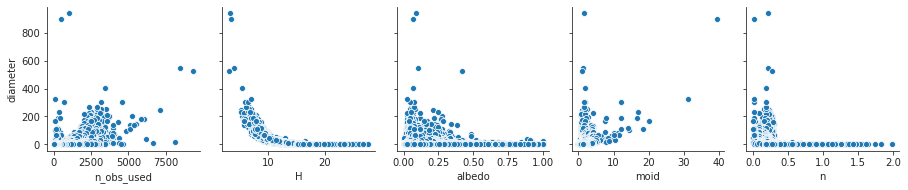

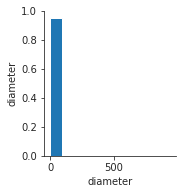

In [ ]:
for i in range(0, len(features_to_analyze), 5):
    sns.pairplot(data=selected_full_df, x_vars=selected_full_df.columns[i:i+5], y_vars=['diameter'])

**From pairplot, We can clearly identify some relationships. Almost all selected features seems to have a relationship with the diameter. We are seeing that 'H', 'albedo', 'data_arc', 'class' and 'n' having a most direct impact of their value's on Target Feature value i.e., diameter.**

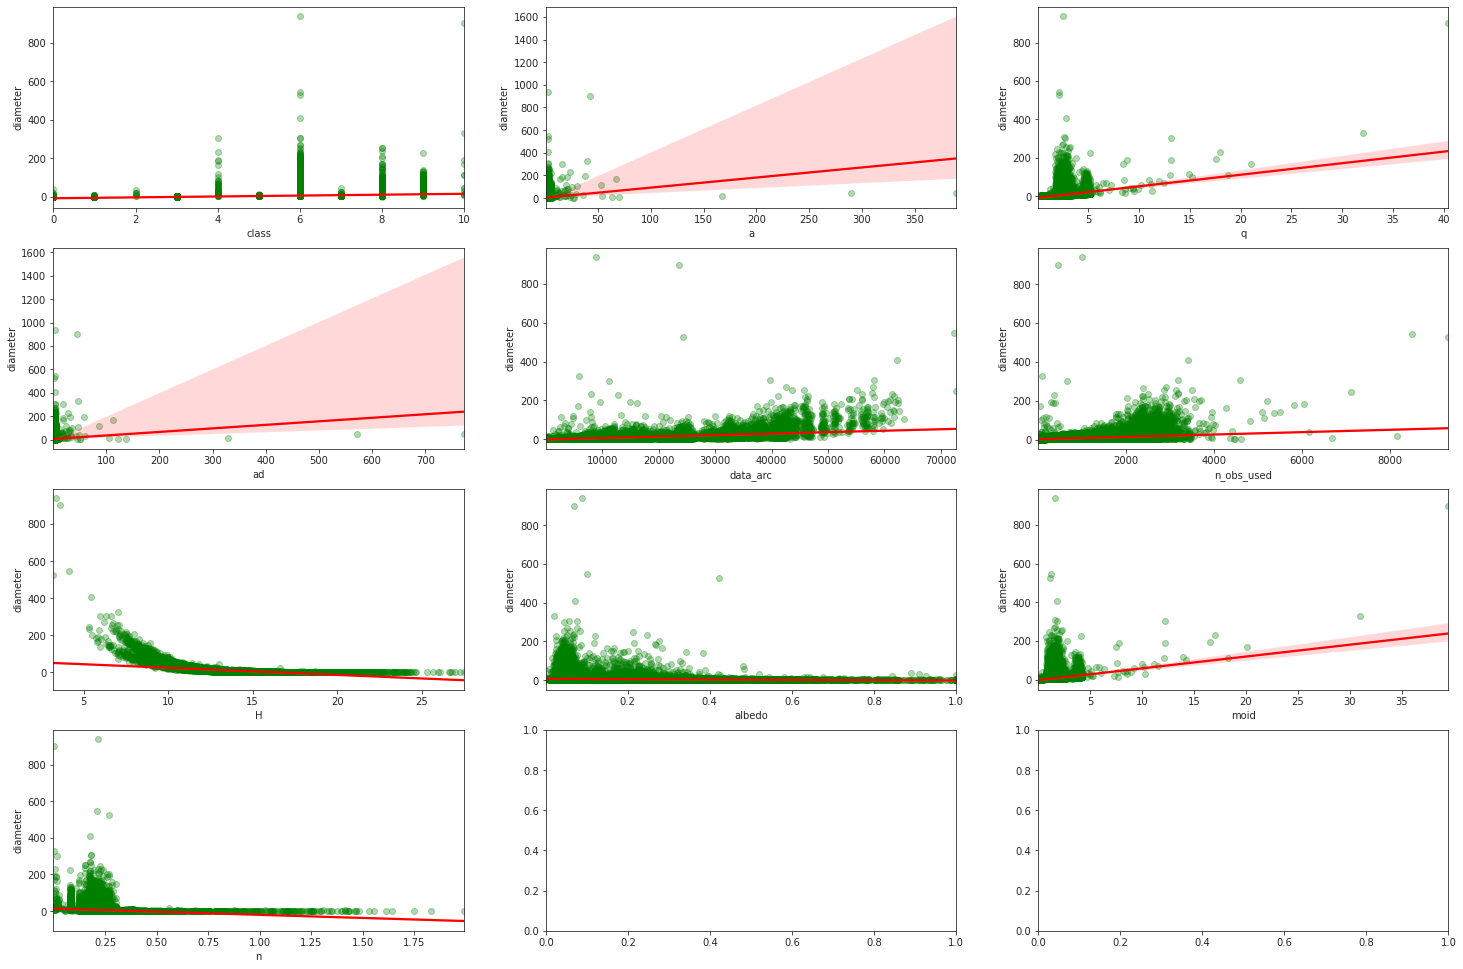

In [ ]:
fig, ax = plt.subplots(round(len(features_to_analyze) / 3), 3, figsize = (25, 17))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyze) - 1:
        sns.set_style("whitegrid")
        sns.regplot(x=features_to_analyze[i], y= 'diameter', data=selected_full_df[features_to_analyze], ax=ax, scatter_kws = {'color': 'g','alpha': 0.3}, line_kws = {'color': 'red'})

**From regplot, We can clearly see that 'class' have linear relationship with diameter. While 'data_arc', 'H', 'albedo' & 'n'  features are showing little spread about line. Also 'a' and 'ad' faetures are showing big spread.**

In [ ]:
# Splitting selected_train_df into 70% and 30% to construct training data and testing data respectively.
trainX, testX, trainy, testy = train_test_split(full_df_X, full_df_y,test_size=0.3, random_state=12) 

#  **XGBoost Regression Model**

In [ ]:
alpha_list = [1e-3, 6e-2, 7e-2, 9e-2, 1e-1, 2e-1, 3e-1, 4e-1]

for alpha in alpha_list:
    XGBModel = XGBRegressor(learning_rate = alpha)
    XGBModel.fit(trainX, trainy)

    print("alpha: ", alpha)
    print("R^2 score (Training): {0:.3f}".format(XGBModel.score(trainX, trainy)))
    print("R^2 score (Testing): {0:.3f}\n".format(XGBModel.score(testX, testy)))

alpha:  0.001
R^2 score (Training): -0.089
R^2 score (Testing): -0.042

alpha:  0.06
R^2 score (Training): 0.994
R^2 score (Testing): 0.870

alpha:  0.07
R^2 score (Training): 0.994
R^2 score (Testing): 0.887

alpha:  0.09
R^2 score (Training): 0.995
R^2 score (Testing): 0.868

alpha:  0.1
R^2 score (Training): 0.995
R^2 score (Testing): 0.875

alpha:  0.2
R^2 score (Training): 0.996
R^2 score (Testing): 0.882

alpha:  0.3
R^2 score (Training): 0.996
R^2 score (Testing): 0.845

alpha:  0.4
R^2 score (Training): 0.997
R^2 score (Testing): 0.847



**We selected alpha equals to 0.07 because it gives the better result among other values.**

In [ ]:
XGBoostModel = XGBRegressor(n_estimators=2000,learning_rate=0.07)             # Defining The Model
XGBoostModel.fit(trainX, trainy)                                             # Start Training the Model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
predicted_train_y = XGBoostModel.predict(trainX)    # Taking Prediction on training data which we created earlier i.e. 70% of selected_full_df

In [ ]:
predicted_test_y = XGBoostModel.predict(testX)     # Taking Prediction on testing data which we created earlier i.e. 30% of selected_full_df

## **Evaluation**

In [ ]:
print("On Training Data:");
errors = abs(predicted_train_y - trainy)
err = 100 * np.mean(errors / trainy)
accuracy = 100 - err
mean_abs_err = mean_absolute_error(trainy, predicted_train_y)
mean_sqr_err = mean_squared_error(trainy, predicted_train_y)
median_abs_err = median_absolute_error(trainy, predicted_train_y)
explained_var_scr = explained_variance_score(trainy, predicted_train_y)

print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))
print('Mean Squared Error = {:0.3f}'.format(mean_sqr_err))
print('Mean Absolute Error = {:0.3f}'.format(mean_abs_err ))
print('Median Absolute Error = {:0.3f}'.format(median_abs_err))
print('Explained Variance Score = {:0.3f}'.format(explained_var_scr)) 

print("Coefficient of determination--------")
print("R^2 score: {0:.3f}".format(r2_score(trainy, predicted_train_y)))

On Training Data:
Average Error: 0.2554 degrees.
Accuracy = 94.02%.
Mean Squared Error = 0.140
Mean Absolute Error = 0.255
Median Absolute Error = 0.171
Explained Variance Score = 0.998
Coefficient of determination--------
R^2 score: 0.998


In [ ]:
print("On Testing Data:");
errors = abs(predicted_test_y - testy)
err = 100 * np.mean(errors / testy)
accuracy = 100 - err
mean_abs_err = mean_absolute_error(testy, predicted_test_y)
mean_sqr_err = mean_squared_error(testy, predicted_test_y)
median_abs_err = median_absolute_error(testy, predicted_test_y)
explained_var_scr = explained_variance_score(testy, predicted_test_y)


print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))
print('Mean Absolute Error = {:0.3f}'.format(mean_abs_err ))
print('Median Absolute Error = {:0.3f}'.format(median_abs_err))
print('Explained Variance Score = {:0.3f}'.format(explained_var_scr))


print("Coefficient of determination--------")
print("R^2 score: {0:.3f}".format(r2_score(testy, predicted_test_y)))

On Testing Data:
Average Error: 0.4213 degrees.
Accuracy = 92.63%.
Mean Absolute Error = 0.421
Median Absolute Error = 0.203
Explained Variance Score = 0.890
Coefficient of determination--------
R^2 score: 0.890


**Giving:<br>R^2 Score as 0.998 & Accuracy as 94.02% on Training Data <br>R^2 Score as 0.890 & Accuracy as 92.63% on Testing data <br>Which is more than enough for excellent model.**

## **Visualization**

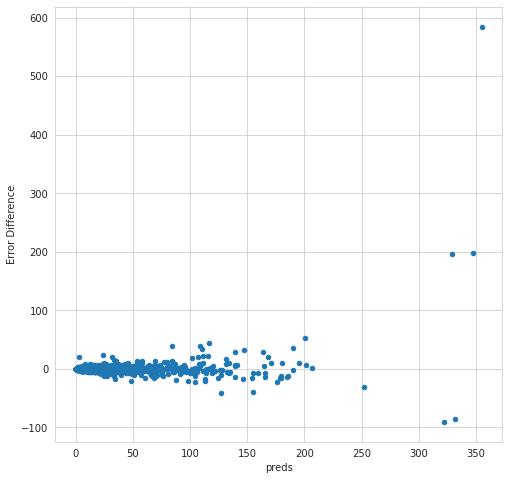

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)

preds = pd.DataFrame({"preds":predicted_test_y, "true":testy})
preds["Error Difference"] = preds["true"] - preds["preds"]                  # Calculating Error Difference
preds.plot(x = "preds", y = "Error Difference", kind = "scatter")

**Almost all of the prediction's have Error difference 0 or near 0. So, we can conclude that our Model is Predicting Excellent.**

Text(0, 0.5, 'Prediction')

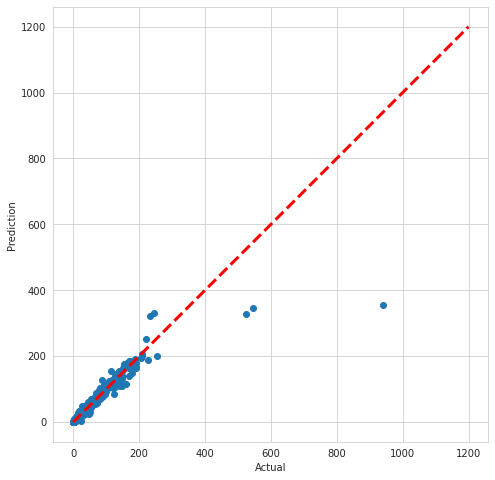

In [ ]:
#Plot Scatter plot b/w Actual and Prediction value of Target variable
plt.scatter(testy,predicted_test_y) 
plt.plot((0,1200),(0,1200),color='red',linewidth=3,linestyle='--') 
plt.axis('square')
plt.xlabel('Actual')
plt.ylabel('Prediction')

**Almost all of the (Actual, Prediction) ie.,(x,y) points are exactly on the line x=y. So, we can conclude that our Model is Predicting Excellent.**

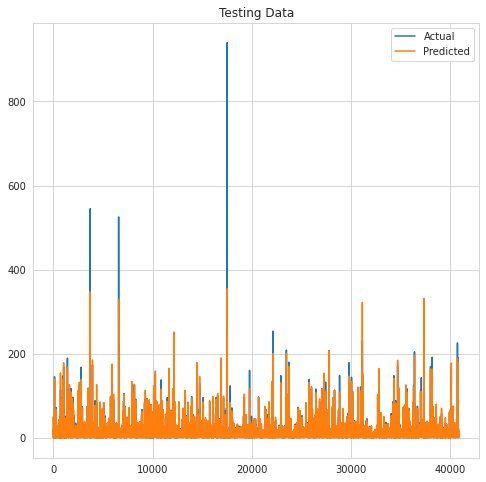

In [ ]:
x_ax = range(len(testy))
plt.plot(x_ax, testy, label="Actual")
plt.plot(x_ax, predicted_test_y, label="Predicted")
plt.title("Testing Data")
plt.legend()
plt.show()



## **Predictions on Test Data:**

In [ ]:
outputdataFrame=pd.DataFrame({'Asteroid Diameter':predicted_test_y})

In [ ]:
#Save to csv
outputdataFrame.to_csv('XGBoost_pred.csv',index=False)
outputdataFrame.head()

,Asteroid Diameter
0,5.751663
1,5.755354
2,20.580729
3,1.762763
4,4.755884


**Thank you**,<br>
Nikunj Bansal,<br>
R177218063,<br>
B2 Batch<br>